### Author: Premdiles, Marius A.
### Updated: 07/04/2025

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import time
from functools import cache
import networkx as nx

# Preface

This will be an overview of the CYK Algorthm aka. (Cocke–Younger–Kasami algorithm):
1. It used Chomsky's Normal Form which helps solves word problems for context-free grammars(CFG).
1. Mostly seen in reecursive algorithms to make it more efficient by storing values of intermediate calculations.  
1. Widely used in almost every artificial intellige
1. It shows up in a LOT of job interviews.

Regarding the last point, I will clarify that it is entirely possible you will take a job with programming and *never* use dynamic programming.  
You *might* if you go to a big tech company, do operations research, or something similar.  
But it shows up in technical interviews, particularly for top-level jobs, because it's a very good litmus test.  
If you understand dynamic programming, you almost certainly know all of data structures and algorithms and (more importantly) how to apply them to a job.  

# Grammar

The main definition of this is "rules of a language governing sounds, words, sentences, and other elements, as well as their interpretations and combinations".
It is also exists in the field of linguistics.
An underlying structure of every language to any native speaker.
It can also be used in the field of computer science by perfoming derivation steps that change strings to other strings and etc.
Think of it as a law placed by the people but substitute the people with words in the making of each sentences.

Features of Grammar

1. *Phology* - study of sound patterns that occurin in languages.
1. *Morphology* - study of constructions of words.
1. *Syntax* - study of formation of words, clauses, phrases.
1. *Semantics* - study of meaning in natural and artificial languages.

These basically constructs the foundation of what we call grammar.
Communications between humans is the most fundamental aspect of an everyday life of each individual human. 
With this, it creates a system where everyone is connected in one way or another which makes a society.
This can be associated with technology as well.

As you can observe, every program and system that you see/use in your everyday life, uses a different programming language for it give an output.
Grammar is not only present in words itself. 
It can be translated into the realms of programming and dynamic coding.








# Context-Free Grammar

With the definiition of grammar clear, this is an application of it. But in a sense of programming. Like laws in a society, there are rules that can say how strings in each class are constructed. They may use:

* Symbols of the alphabet
* Strings that are already known to be in on of the classes
* or both

Using this idea, you can make a formal system that can make use of languages a.k.a [context-free language (CFLs)](https://www.geeksforgeeks.org/theory-of-computation/various-properties-of-context-free-languages-cfl/). The purpose of this is:

* *Production Rule* - having a set of rules when listing all strings in a language
* it has the ability to extend the capabilities of regular expressions

Here's a good example:

Visualize it as grammar is a tuple that consists of (V, T, P, S) where:

* V is the set of variables that are finite. And each variable represent a language which are set of strings

* T is the set of terminals that are finite which have symbols that form strings from languages that are being defined.

* P is the set production rules that represents the recursive definition of languages

* S is the start symbol which gives the definition to the languages

Production Rule of the form:

$$ A → a$$
$$ where, \; a = {V \cup T}^* \; and \; A ∈ V$$

Visual Representation below:





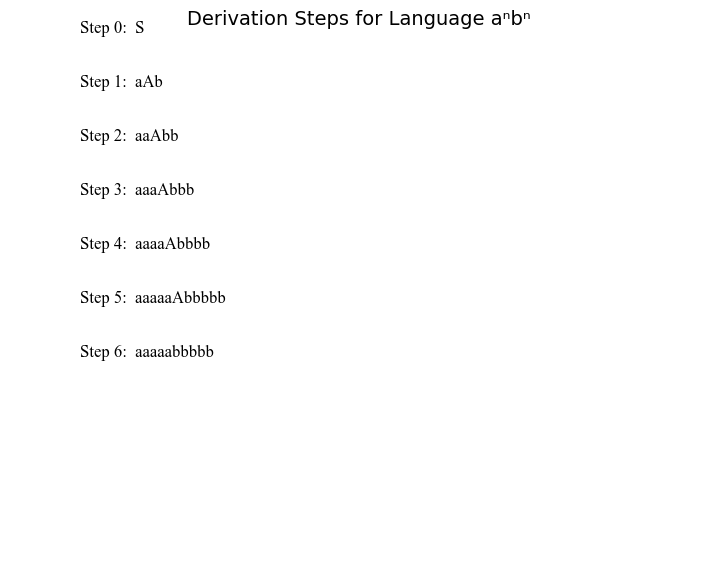

In [2]:
### Visualization Sample:

#  Define the production rules
def derive(cfg_string):
    if 'S' in cfg_string:
        return [cfg_string.replace('S', 'aAb', 1)]
    elif 'A' in cfg_string:
        return [cfg_string.replace('A', 'aAb', 1), cfg_string.replace('A', '', 1)]
    return []

def visualize_derivation(steps):
    plt.figure(figsize=(9, len(steps)))
    plt.axis('off')

    for i, step in enumerate(steps):
        plt.text(0.1, 1 - i * 0.1, f"Step {i}:  {step}", fontsize=12, family='Times New Roman')

    plt.title("Derivation Steps for Language aⁿbⁿ", fontsize=14)
    plt.show()

# This makes the derivation from each variable from its on respected factor
def generate_anbn(n):

    steps = []
    current = 'S'
    steps.append(current)

    # We substitute the variable S with 'aAb'
    current = current.replace('S', 'aAb')
    steps.append(current)

    # Substitute A to 'aAb', (n-1) times
    for _ in range(n - 1):
        current = current.replace('A', 'aAb', 1)
        steps.append(current)

    # Replacing 'A' with ε
    current = current.replace('A', '', 1)
    steps.append(current)

    return steps

# Example usage:
n = 5  # You can change this value
steps = generate_anbn(n)
visualize_derivation(steps)


### Context-Free Grammar vs. Context-Sensitive Grammar





# Parsing and Formal Grammar

As we have defined earlier, grammar is basically rules which are implemented in sentences and strings. Imagine parsing as like figuring out whether a sentence "makes sense" based on grammar rules.Connecting this into computer science, parsing helps a program break down a sentence (or input) and check its structure.

Visualize making a sandwich or building a LEGO model:

- Grammar rules are like step-by-step instructions.

- Parsing is checking if you followed the instructions correctly.

In language, the sentence “The dog runs” makes sense, but “Runs the dog” sounds off.
Parsing helps a computer figure out the same thing — whether the structure is valid. We use something called a syntax tree to represent the structure of a sentence. Each "branch" of the tree shows how small parts come together to make the full sentence. 

Think of it this way, you have a sentence in English:

**Input** = “The dog runs” 

**Thinking if** = “Runs the dog” (technically correct in poetry maybe, but not standard)

In computing, grammar rules look like this:

1. S → NP VP

1. NP → Det Noun

1. VP → Verb

If you sum it all up, it is basically saying that:

- A Sentence (S) is made of a Noun Phrase (NP) followed by a Verb Phrase (VP)

- A Noun Phrase (NP) is made of a Determiner (Det) and a Noun

- A Verb Phrase (VP) is just a Verb

You can imagine this like a board game or cookie-cutter:

Each shape fits together in a certain way.

If you follow the rules, the final sentence is “legal”.

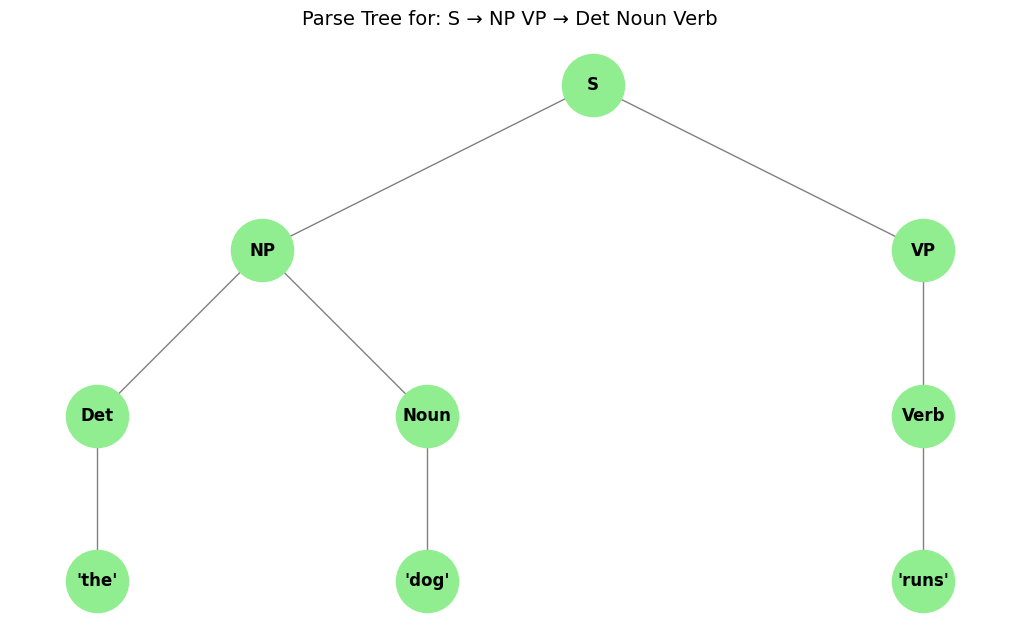

In [5]:
# Define CFG-based binary tree structure for: S → NP VP → Det Noun Verb
edges = [
    ("S", "NP"), ("S", "VP"),
    ("NP", "Det"), ("NP", "Noun"),
    ("VP", "Verb"),
    ("Det", "'the'"), ("Noun", "'dog'"), ("Verb", "'runs'")
]

G = nx.DiGraph()
G.add_edges_from(edges)

pos = {
    "S": (0, 4),
    "NP": (-2, 3), "VP": (2, 3),
    "Det": (-3, 2), "Noun": (-1, 2), "Verb": (2, 2),
    "'the'": (-3, 1), "'dog'": (-1, 1), "'runs'": (2, 1)
}

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, arrows=False,
        node_color='lightgreen', node_size=2000,
        font_size=12, font_weight='bold', edge_color='gray')
plt.title("Parse Tree for: S → NP VP → Det Noun Verb", fontsize=14)
plt.axis('off')
plt.show()

### Chomsky's Normal Form

Chomsky Normal Form (CNF) is a standardized way of writing rules in a **context-free grammar (CFG)**. It simplifies how we parse languages, especially when using parsing algorithms like **CYK (Cocke-Younger-Kasami)**. 

CNF imposes a strict structure on grammar rules, allowing each rule to follow a specific and limited format. This structure eliminates irregularities that would otherwise complicate parsing.

By converting a grammar into CNF, we ensure that every rule fits into a form that a parser like CYK can systematically handle. Instead of dealing with varied rule lengths or mixed symbol types, the parser only needs to process two types of rules: **binary combinations** or **single terminals**. This standardization simplifies the parsing process and improves performance.

### Dynamic programming for parsing

*Visual representation of dp table*

# CYK Algorithm and Implementation
The CYK algorithm (Cocke–Younger–Kasami) is a bottom-up parsing algorithm used to determine if a string can be generated by a context-free grammar (CFG) in Chomsky Normal Form (CNF).

It constructs a dynamic programming table to evaluate all possible ways to derive substrings of the input from grammar rules. If the start symbol of the grammar derives the entire input string, the string is accepted by the grammar.

- **Goal:** Determine if a string `w` belongs to the language generated by a CFG.
- **Input:** A CNF grammar and an input string of `n` words.
- **Output:** Yes/No (Is the string derivable from the grammar?)

**Key Idea:**\
It constructs a triangular table `T[i][j]`, where each cell contains the set of non-terminals that can generate the substring `w[i..j]`.

**Time Complexity:** O(n³ * |P|), where |P| is the number of productions.


In [2]:
### Code for cyk algo and comments for step-by-step in the code itself

from collections import defaultdict

# CNF Grammar (dictionary form)
grammar = {
    "S": [("NP", "VP")],
    "NP": [("Det", "N")],
    "VP": [("V", "NP")],
    "Det": [("the",)],
    "N": [("dog",), ("cat",)],
    "V": [("chased",)]
}

# Reverse grammar for lookup: maps terminals and pairs to nonterminals
def build_reverse_grammar(grammar):
    reverse = defaultdict(list)
    for lhs in grammar:
        for rule in grammar[lhs]:
            reverse[rule].append(lhs)
    return reverse

# CYK algorithm
def cyk_parse(words, grammar):
    n = len(words)
    table = [[set() for _ in range(n)] for _ in range(n)]
    rev_grammar = build_reverse_grammar(grammar)

    # Fill in base case
    for i in range(n):
        table[i][i] = set(rev_grammar.get((words[i],), []))

    # Fill in upper triangle
    for l in range(2, n + 1):  # substring length
        for i in range(n - l + 1):
            j = i + l - 1
            for k in range(i, j):
                for B in table[i][k]:
                    for C in table[k + 1][j]:
                        table[i][j].update(rev_grammar.get((B, C), []))

    return table, "S" in table[0][n - 1]


In [3]:
### Test code for cyk algorithm

# Input sentence
sentence = "the dog chased the cat".split()

# Run CYK
table, is_valid = cyk_parse(sentence, grammar)

# Display result
print(f"Is the sentence valid? {'Yes' if is_valid else 'No'}")

# Pretty print CYK table
print("\nCYK Table:")
n = len(sentence)
for row in range(n):
    print([table[row][col] if col >= row else '' for col in range(n)])


Is the sentence valid? Yes

CYK Table:
[{'Det'}, {'NP'}, set(), set(), {'S'}]
['', {'N'}, set(), set(), set()]
['', '', {'V'}, set(), {'VP'}]
['', '', '', {'Det'}, {'NP'}]
['', '', '', '', {'N'}]


In [11]:
### Test code for cyk 
# Input: Str("The dog chased the cat")
# Representation (Table visualization)
# Output: valid grammar (Yes.)
# ###

In [12]:
### Test code to example and analogy

# Extensions

*When CNF conversion is a problem*
*Efficiency and limitations*
 

# Summary